# Importing Libraries

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading of dataset

In [2]:
df = pd.read_csv('./API_AG.LND.FRST.ZS_DS2_en_csv_v2_3890972.csv', header=2) 

# Visualizing dataset

In [3]:
df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.972492,31.761842,31.551270,31.340526,31.119431,30.903543,30.690224,30.469798,30.251786,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.498099,20.410143,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816762,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,56.988751,56.543526,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,NaN


# Performing Explainatorty data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

In [5]:
df.size

17556

In [6]:
df.shape

(266, 66)

In [7]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

# Checking for null values

In [8]:
df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
                 ... 
2017                5
2018                5
2019                9
2020                9
Unnamed: 65       266
Length: 66, dtype: int64

# Removal of Columns with null values

In [9]:
df1 = df.drop(["1960", "1961", "1962", "1963", "1964", "1965", "1966", "1967", "1968", "1969", "1970", "1971", "1972", "1973", "1974", "1975", "1976", "1977", "1978", "1979", "1980", "1981", "1982", "1983", "1984", "1985", "1986", "1987", "1988", "1989"], axis = 1)

In [10]:
df1

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,40.565912,40.403946,40.235807,40.269690,40.103270,39.936851,...,31.972492,31.761842,31.551270,31.340526,31.119431,30.903543,30.690224,30.469798,30.251786,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,...,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,22.776908,22.658746,22.540583,22.422421,22.304258,22.186096,...,20.498099,20.410143,20.322187,20.234231,20.152610,20.071327,19.986100,19.901215,19.816762,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,63.578070,63.453407,63.328745,63.204082,63.079419,62.954757,...,56.988751,56.543526,56.098301,55.653076,55.207845,54.762629,54.317406,53.872175,53.426951,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Forest area (% of land area),AG.LND.FRST.ZS,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,...,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,NaN
263,South Africa,ZAF,Forest area (% of land area),AG.LND.FRST.ZS,14.955271,14.925265,14.895259,14.865253,14.835247,14.805241,...,14.295139,14.265133,14.235127,14.205121,14.175115,14.145109,14.115103,14.085097,14.055091,NaN
264,Zambia,ZMB,Forest area (% of land area),AG.LND.FRST.ZS,63.778098,63.729940,63.681782,63.633624,63.585467,63.537309,...,62.308667,62.055529,61.802392,61.549254,61.295955,61.042885,60.789707,60.536515,60.283337,NaN


In [11]:
df1.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1990               13
1991                9
1992                9
1993                9
1994                9
1995                9
1996                9
1997                9
1998                9
1999                9
2000                5
2001                8
2002                8
2003                8
2004                8
2005                8
2006                8
2007                8
2008                8
2009                8
2010                5
2011                4
2012                4
2013                4
2014                4
2015                4
2016                4
2017                5
2018                5
2019                9
2020                9
Unnamed: 65       266
dtype: int64

In [12]:
df1=df1.fillna(0)

# Verification procedure

In [13]:
df1.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
Unnamed: 65       0
dtype: int64

# Obtaining Country names

In [14]:
a = df1['Country Name'].unique()
print(a)

['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Channel Islands' 'Chile' 'China' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (excluding high income)'

# Data Vizualization procedure

# Bar plot Implementation

<AxesSubplot:xlabel='2016', ylabel='2018'>

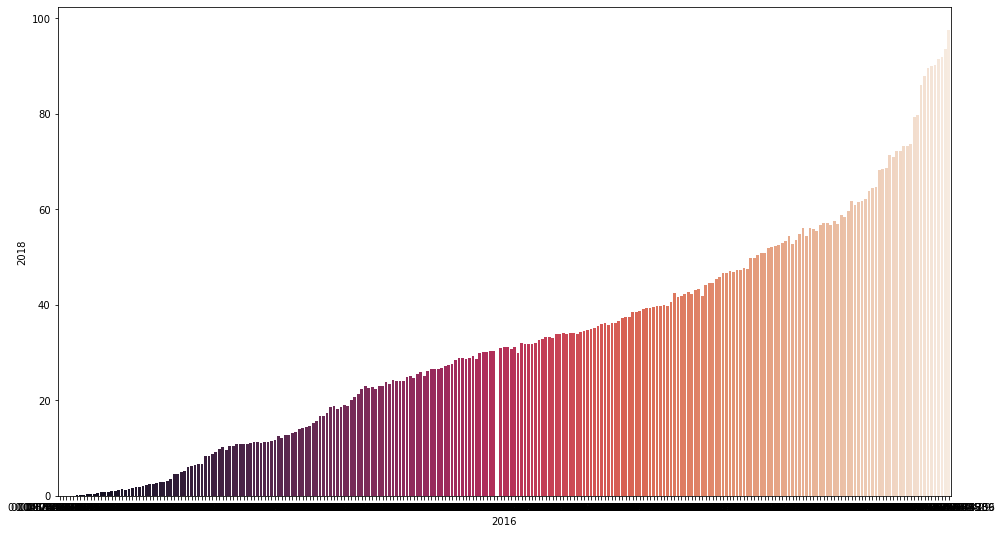

In [15]:
fig = plt.figure(figsize = (16,9))
sns.barplot(x = '2016', y = '2018', palette = 'rocket', data = df1)

<AxesSubplot:xlabel='2001', ylabel='2005'>

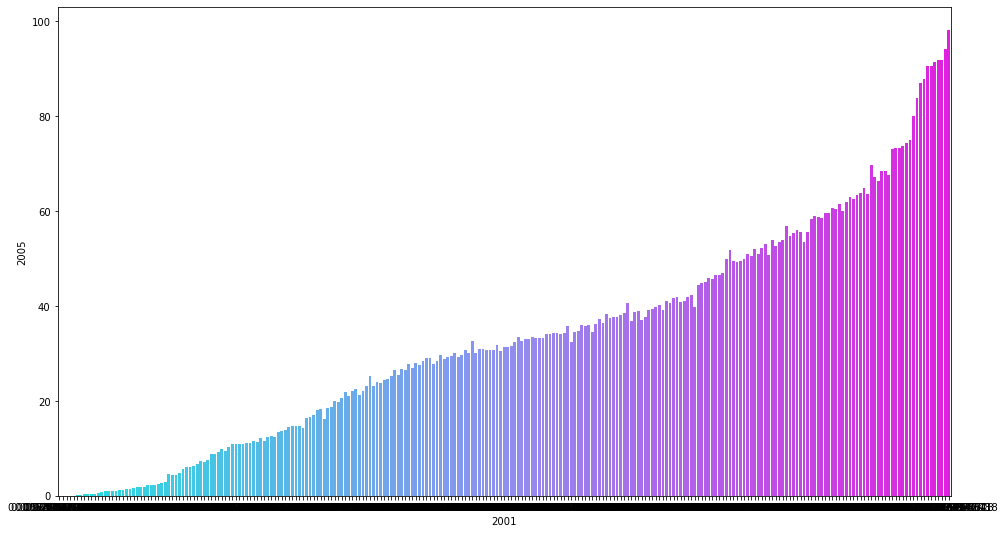

In [16]:
fig = plt.figure(figsize = (16,9))
sns.barplot(x = '2001', y = '2005', palette = 'cool', data = df1)

<AxesSubplot:xlabel='1999', ylabel='1990'>

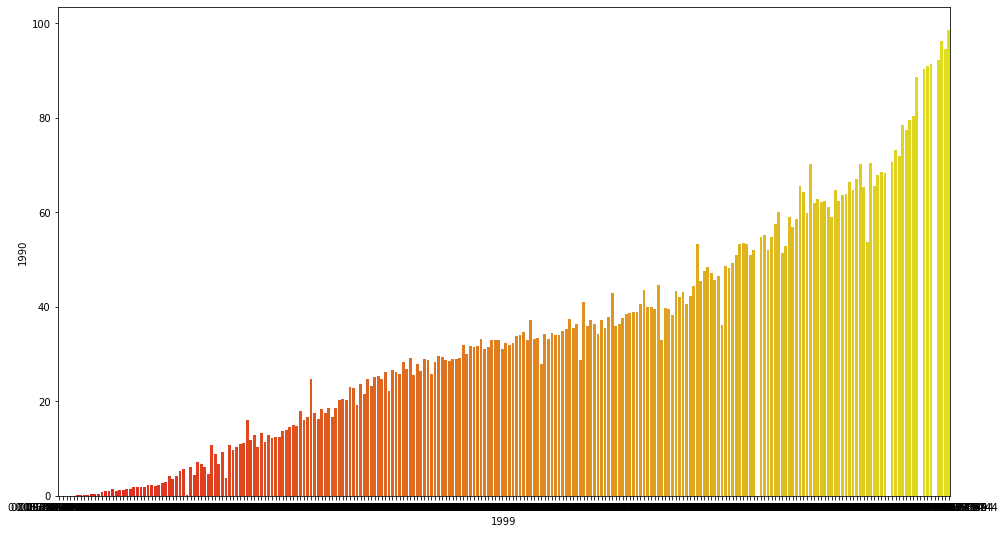

In [17]:
fig = plt.figure(figsize = (16,9))
sns.barplot(x = '1999', y = '1990', palette = 'autumn', data = df1)

# Pie chart Implementation

<AxesSubplot:ylabel='2000'>

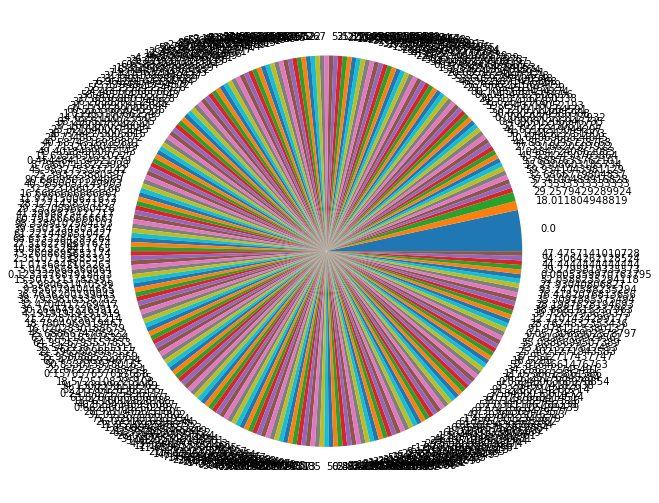

In [18]:
plt.figure(figsize=(16,9))
df1['2000'].value_counts().plot.pie()

# Count Plot Implementation

<AxesSubplot:xlabel='2003', ylabel='count'>

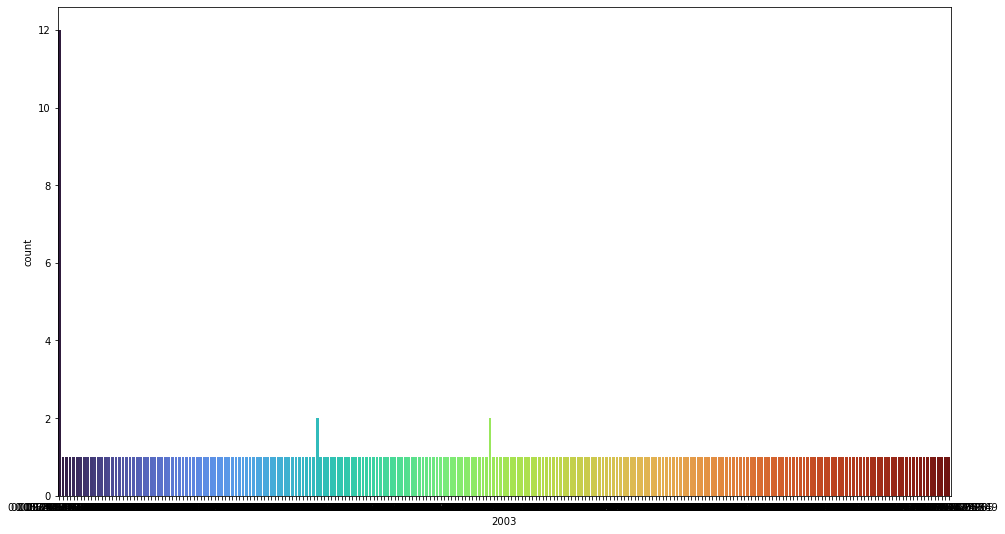

In [19]:
fig = plt.figure(figsize = (16,9))
sns.countplot(x = '2003', palette = 'turbo', data = df1)

# Implementyation of line plot

<AxesSubplot:xlabel='2003', ylabel='1990'>

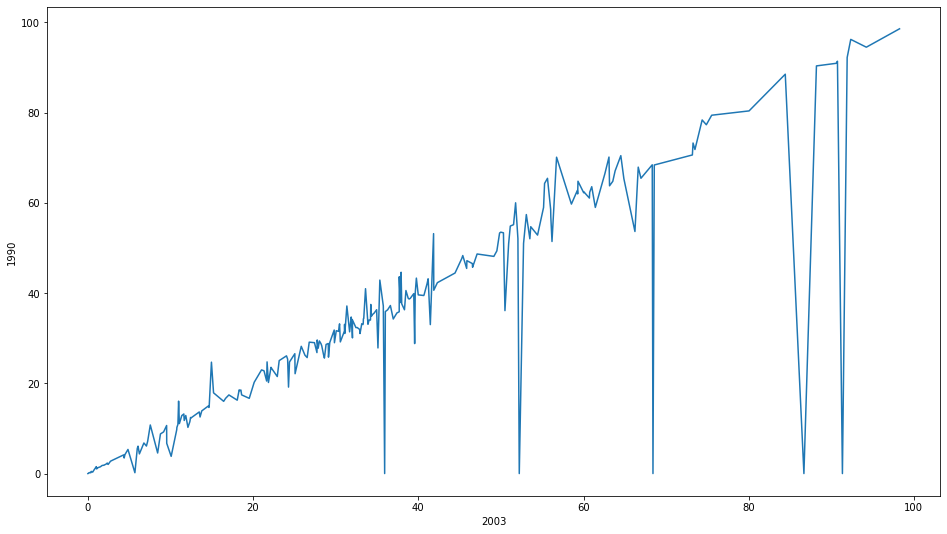

In [20]:
fig = plt.figure(figsize = (16,9))
sns.lineplot(x = '2003', y = '1990', data = df1)

<AxesSubplot:xlabel='2018', ylabel='1995'>

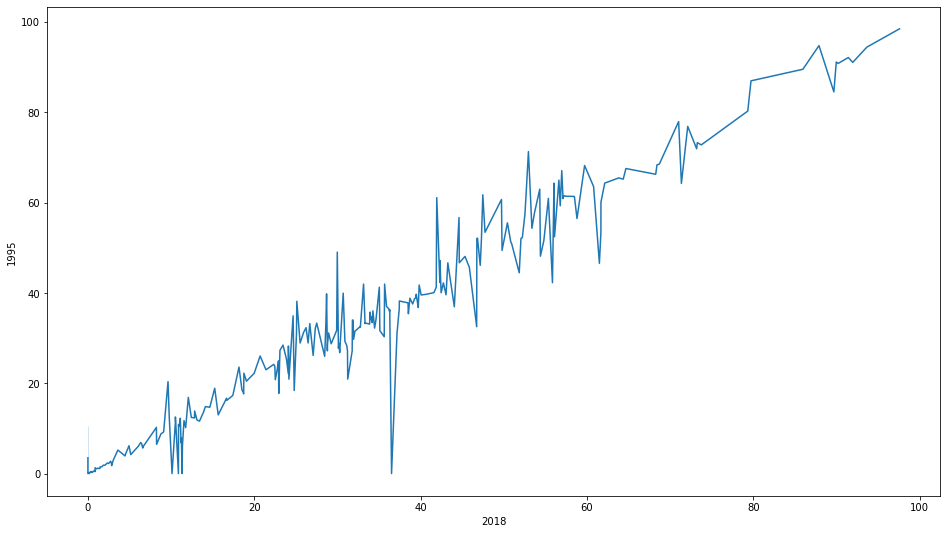

In [21]:
fig = plt.figure(figsize = (16,9))
sns.lineplot(x = '2018', y = '1995', data = df1)

# Visual Representation among two different countries

### Utilizing Mexico dataset 

In [23]:
Mexico_data = df1[df1['Country Name'] == "Mexico"]
Mexico_data

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
154,Mexico,MEX,Forest area (% of land area),AG.LND.FRST.ZS,36.313511,36.19981,36.086108,35.972407,35.858705,35.745004,...,34.310733,34.247728,34.184722,34.121716,34.055994,33.990267,33.92454,33.858818,33.793091,0.0


#### Utilizing Mexico dataset

In [24]:
UAE_data = df1[df1['Country Name'] == "United Arab Emirates"]
UAE_data

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
8,United Arab Emirates,ARE,Forest area (% of land area),AG.LND.FRST.ZS,3.449732,3.540453,3.631174,3.721895,3.812616,3.903337,...,4.467756,4.467756,4.467756,4.467756,4.467756,4.467756,4.467756,4.467756,4.467756,0.0


In [25]:
daf = pd.concat([Mexico_data, UAE_data], axis=0)

In [26]:
daf

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
154,Mexico,MEX,Forest area (% of land area),AG.LND.FRST.ZS,36.313511,36.199810,36.086108,35.972407,35.858705,35.745004,...,34.310733,34.247728,34.184722,34.121716,34.055994,33.990267,33.924540,33.858818,33.793091,0.0
8,United Arab Emirates,ARE,Forest area (% of land area),AG.LND.FRST.ZS,3.449732,3.540453,3.631174,3.721895,3.812616,3.903337,...,4.467756,4.467756,4.467756,4.467756,4.467756,4.467756,4.467756,4.467756,4.467756,0.0


### Comparison 

<AxesSubplot:xlabel='Country Name'>

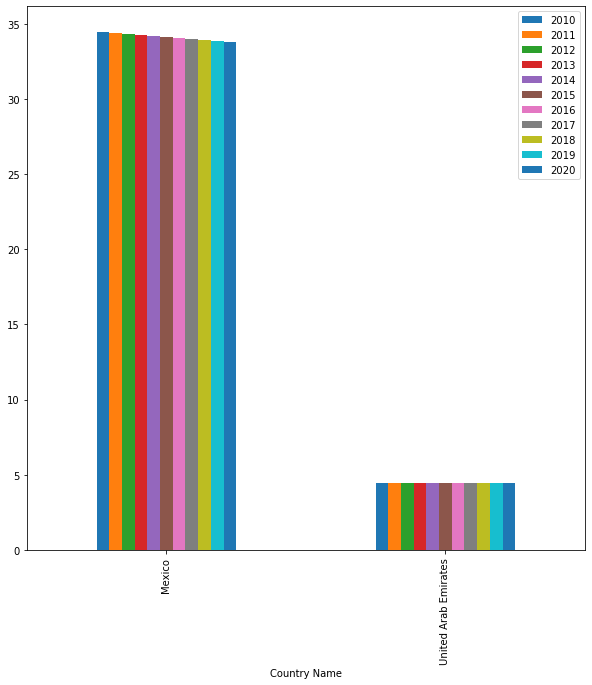

In [44]:
daf.plot(x="Country Name", y=['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
        kind="bar", figsize=(10, 10))

In the present study, a detailed comparison among forest area cover among two different countries such as Mexico and United Arab Emirates are compared for the last 10 years. Considering the above stated fact, it can be significantly conveyed that the land cover by forest is more in mexico than arable land. On the other hand, for UAE forest land cover is significantly lower as compared to arable land